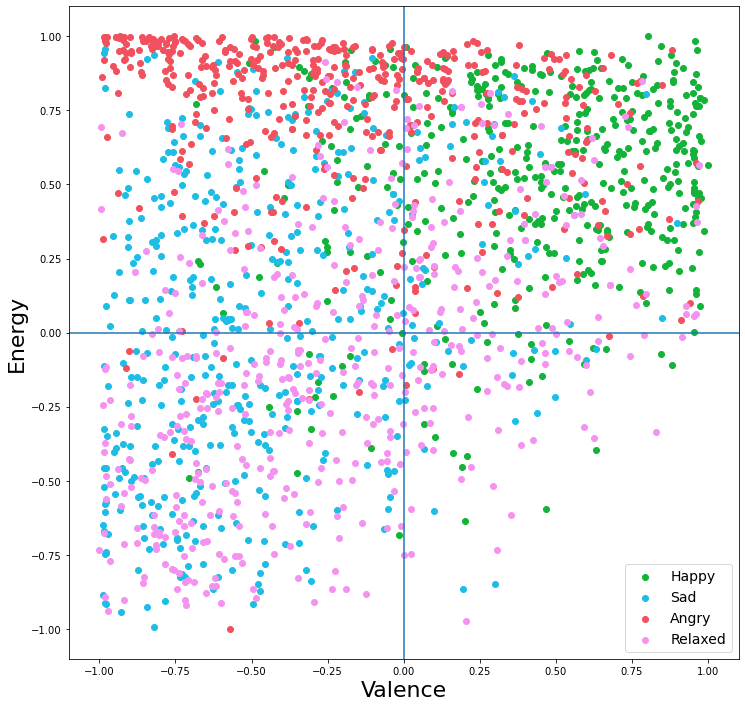

In [25]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

df = pd.read_csv("data/preprocessed/spotify-data-preprocessed.csv", index_col=0)

av = df[["valence", "energy"]].to_numpy()
labels = df[["is_happy", "is_sad", "is_angry", "is_relaxed"]].to_numpy()

av[:, 0] -= np.min(av[:, 0])
av[:, 1] -= np.min(av[:, 1])

max_x = np.max(av[:, 0])
max_y = np.max(av[:, 1])

av[:, 0] /= max_x * 0.5
av[:, 1] /= max_y * 0.5

av[:, 0] -= 1
av[:, 1] -= 1

plt.figure(figsize=(12, 12))
plt.scatter(av[np.where(labels[:, 0]==1), 0], av[np.where(labels[:, 0]==1), 1], label="Happy", c="#13B238")
plt.scatter(av[np.where(labels[:, 1]==1), 0], av[np.where(labels[:, 1]==1), 1], label="Sad", c="#1dbde6")
plt.scatter(av[np.where(labels[:, 2]==1), 0], av[np.where(labels[:, 2]==1), 1], label="Angry", c="#f1515e")
plt.scatter(av[np.where(labels[:, 3]==1), 0], av[np.where(labels[:, 3]==1), 1], label="Relaxed", c="#f492f0")
plt.axhline(0)
plt.axvline(0)
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.xlabel("Valence", fontsize=22)
plt.ylabel("Energy", fontsize=22)
# plt.title("Mapping Spotify's Energy and Valence on a 2D plane", fontsize=28)
plt.legend(prop={'size': 14})

plt.savefig("graphs/energy-valence-spotify.png")

In [26]:
av = df.to_numpy()[:, 2:-4]
labels = df[["is_happy", "is_sad", "is_angry", "is_relaxed"]].to_numpy()

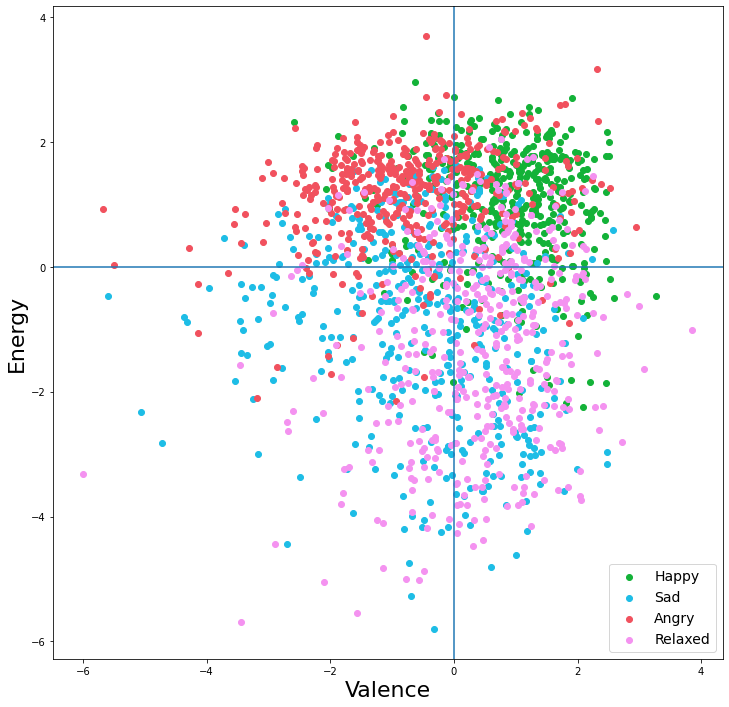

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

av = pca.fit_transform(av) * -1

plt.figure(figsize=(12, 12))
plt.scatter(av[np.where(labels[:, 0]==1), 1], av[np.where(labels[:, 0]==1), 0], label="Happy", c="#13B238")
plt.scatter(av[np.where(labels[:, 1]==1), 1], av[np.where(labels[:, 1]==1), 0], label="Sad", c="#1dbde6")
plt.scatter(av[np.where(labels[:, 2]==1), 1], av[np.where(labels[:, 2]==1), 0], label="Angry", c="#f1515e")
plt.scatter(av[np.where(labels[:, 3]==1), 1], av[np.where(labels[:, 3]==1), 0], label="Relaxed", c="#f492f0")
plt.axhline(0)
plt.axvline(0)
plt.xlabel("Valence", fontsize=22)
plt.ylabel("Energy", fontsize=22)
# plt.title("Mapping Spotify's Energy and Valence on a 2D plane", fontsize=28)
plt.legend(loc='lower right', prop={'size': 14})

plt.savefig("graphs/PCAs-spotify.png")
# Flipped x - y axis and multiplied by (-1)

In [28]:
pca.explained_variance_ratio_

array([0.27352891, 0.17826973])

In [29]:
embeddings = pd.read_csv("data/preprocessed/embeddings.csv", index_col=0).to_numpy()
av = df.to_numpy()[:, 2:-4].reshape(av.shape[0], 1)
labels = df[["is_happy", "is_sad", "is_angry", "is_relaxed"]].to_numpy()

ValueError: cannot reshape array of size 19767 into shape (1797,1)

In [22]:
concat = np.hstack((av, embeddings))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1797 and the array at index 1 has size 1745

In [23]:
extra_labels = [f"embed_{x}" for x in range(embeddings.shape[1])]
df_concat = pd.DataFrame(concat, columns=list(df.columns[2:-4]) + extra_labels)
df_concat.drop(["energy", "valence"], axis=1)

NameError: name 'concat' is not defined

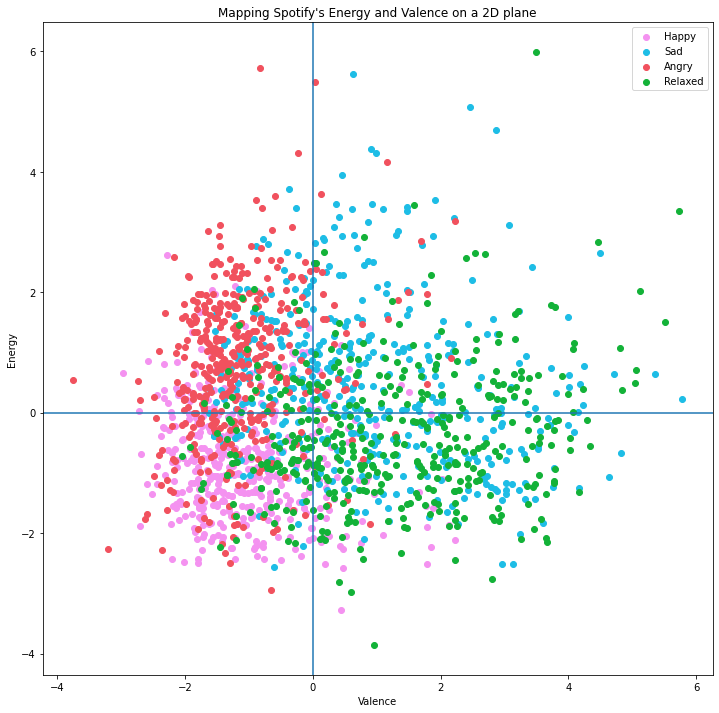

In [295]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

av = pca.fit_transform(df_concat)

# av[:, 0] -= np.min(av[:, 0])
# av[:, 1] -= np.min(av[:, 1])

# max_x = np.max(av[:, 0])
# max_y = np.max(av[:, 1])

# av[:, 0] /= max_x * 0.5
# av[:, 1] /= max_y * 0.5

# av[:, 0] -= 1
# av[:, 1] -= 1

plt.figure(figsize=(12, 12))
plt.scatter(av[np.where(labels[:, 0]==1), 0], av[np.where(labels[:, 0]==1), 1], label="Happy", c="#f492f0")
plt.scatter(av[np.where(labels[:, 1]==1), 0], av[np.where(labels[:, 1]==1), 1], label="Sad", c="#1dbde6")
plt.scatter(av[np.where(labels[:, 2]==1), 0], av[np.where(labels[:, 2]==1), 1], label="Angry", c="#f1515e")
plt.scatter(av[np.where(labels[:, 3]==1), 0], av[np.where(labels[:, 3]==1), 1], label="Relaxed", c="#13B238")
plt.axhline(0)
plt.axvline(0)
# plt.xlim((-1.1, 1.1))
# plt.ylim((-1.1, 1.1))
plt.xlabel("Valence")
plt.ylabel("Energy")
plt.title("Mapping Spotify's Energy and Valence on a 2D plane")
plt.legend()

In [305]:
_labels = np.array([np.argmax(x) for x in labels])
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier


skf = StratifiedKFold(n_splits=5)
accs = []
X = av ; y = _labels
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index ], y[test_index]

    model = ExtraTreesClassifier(n_estimators=420)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accs += [accuracy_score(y_test, y_pred)]
print(f"Average accuracy: {np.mean(accs)}")

Average accuracy: 0.532378223495702


In [285]:
extra_labels = [f"embed_{x}" for x in range(embeddings.shape[1])]
df_concat = pd.DataFrame(concat, columns=list(df.columns[2:-4]) + extra_labels)
df_concat.drop(["energy", "valence"], axis=1)

In [317]:
print(pca.components_[1])

[-1.99780357e-02  3.95238797e-01  1.98128344e-01 -5.70725138e-01
  1.93270752e-01  1.19830018e-01 -1.44978943e-02 -2.34552363e-01
  3.50161312e-01  1.43553808e-01 -4.77164298e-01 -4.69429492e-03
 -1.45133900e-03  2.91119216e-03  1.67159764e-03 -1.66821721e-03
 -1.13572753e-03 -2.23676562e-03  1.10559014e-05  1.32422953e-03
 -1.87401066e-03 -4.11677446e-04  3.20808000e-03 -5.59568178e-03
  3.34692977e-03  5.25632810e-04 -4.10862340e-03  3.39944504e-03
 -2.08508240e-03  7.11683488e-03 -1.83145372e-03  2.16294213e-03
  1.50894010e-03 -1.10520380e-03  1.77748241e-04 -7.88580295e-04
  1.09225470e-02  4.37602208e-03  5.01275619e-03 -4.08252492e-03
 -2.36435796e-03  3.92501814e-05  1.12345472e-05  9.30657474e-04
 -5.73478725e-03  5.59808589e-03  2.31486846e-03 -1.56680894e-03
 -6.01901746e-04  1.85222870e-03 -2.25311566e-04  2.73110550e-03
 -2.81360097e-03  5.52244505e-03  2.63996975e-03 -2.95134535e-03
 -2.28825508e-03 -5.80167787e-04 -4.88069416e-03  5.26951115e-04
  2.91339900e-03]
